<a href="https://colab.research.google.com/github/rikrdinii1/PDN-Data21/blob/main/Analisis_Deuda%2C_Ingresos_Totales%2C_Estudios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
# Lectura inicial de los datos
metadata = pd.read_csv('/content/drive/MyDrive/Dataton2021/metadata.csv')
data_gen = pd.read_csv('/content/drive/MyDrive/Dataton2021/Datos_Generales.csv')
deuda = pd.read_csv('/content/drive/MyDrive/Dataton2021/Adeudos.csv')
datos_empleo = pd.read_csv('/content/drive/MyDrive/Dataton2021/Datos_EmpleoCargoComision.csv')
estudios = pd.read_csv('/content/drive/MyDrive/Dataton2021/Estudios.csv')
exp_laboral = pd.read_csv('/content/drive/MyDrive/Dataton2021/Experiencia_Laboral.csv')
ingresos = pd.read_csv('/content/drive/MyDrive/Dataton2021/Ingresos_Anuales.csv')

# Transformacion de datos
metadata.drop('Unnamed: 0', axis=1,inplace=True)
metadata.reset_index(drop=True,inplace=True)
metadata['actualizacion'] = pd.to_datetime(metadata['actualizacion'])

data_gen.drop('Unnamed: 0', axis=1,inplace=True)
data_gen.reset_index(drop=True,inplace=True)
data_gen['regimenMatrimonial.valor'].replace({'Separación de Bienes':'SEPARACIÓN DE BIENES'}, inplace=True)
data_gen['situacionPersonalEstadoCivil.valor'].replace({'SOLTERO (A)':'SOLTERO', 
                                                        'DIVORCIADO (A)':'DIVORCIADO',
                                                        'CASADO (A)':'CASADO',
                                                        'VIUDO (A)':'VIUDO'},inplace=True)

ingresos.drop('Unnamed: 0', axis=1,inplace=True)
ingresos.replace({np.nan:0})

ingresos = ingresos[[
       'totalIngresosAnualesNetos.valor',
       '_id', 'id',
       'totalIngresosConclusionNetos.valor',
       'serviciosProfesionales.valor',
       'otrosIngresosMensualesTotal.valor',
       'otrosIngresosTotal.valor'
       ]]


# Nos quedamos solo con las columnas utiles
cols = ['nombre', 'primerApellido', 'segundoApellido', 'curp', 'paisNacimiento',
       'nacionalidad', 'rfc.rfc', 'rfc.homoClave',
       'situacionPersonalEstadoCivil.clave',
       'situacionPersonalEstadoCivil.valor', '_id', 'id',
       'regimenMatrimonial.clave', 'regimenMatrimonial.valor']

data_gen = data_gen[cols]

data = pd.merge(metadata,data_gen,on='id')
data.drop('_id_x',axis=1,inplace=True)

deuda.drop('Unnamed: 0', axis=1,inplace=True)
deuda = pd.merge(deuda,data,on='id')
deuda.drop('_id_y', axis=1,inplace=True)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,11,25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (48,49,50,52,54,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:

data.head()

,actualizacion,tipo,institucion,declaracionCompleta,actualizacionConflictoInteres,id,nombre,primerApellido,segundoApellido,curp,paisNacimiento,nacionalidad,rfc.rfc,rfc.homoClave,situacionPersonalEstadoCivil.clave,situacionPersonalEstadoCivil.valor,_id_y,regimenMatrimonial.clave,regimenMatrimonial.valor
0,2018-06-12 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,ca1336ce-9a12-413a-bab3-b57d85a0948d,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,61a804c8f6e28cab0bf39988,NaN,NaN
1,2015-06-05 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,c059912d-1d11-4f50-b027-f6dfca8f8418,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,61a804c8f6e28cab0bf39989,NaN,NaN
2,2017-06-06 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,ff372d3d-d898-40f8-8577-9cd5ffa1be68,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,61a804c8f6e28cab0bf3998a,NaN,NaN
3,2015-02-06 00:00:00+00:00,INICIAL,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,2f8f42bf-56cc-4c14-af44-d744b70824a4,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,61a804c8f6e28cab0bf3998b,NaN,NaN
4,2020-06-08 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,5736d89a-a9bc-4fad-be67-985aa04b47df,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,61a804c8f6e28cab0bf3998c,NaN,NaN


In [4]:

deuda.head()

,tipoOperacion,titular,numeroCuentaContrato,fechaAdquisicion,porcentajeIncrementoDecremento,tipoAdeudo.clave,tipoAdeudo.valor,montoOriginal.valor,montoOriginal.moneda,otorganteCredito.tipoPersona,otorganteCredito.nombreInstitucion,otorganteCredito.rfc,localizacionAdeudo.pais,saldoInsolutoDiciembreAnterior.valor,saldoInsolutoDiciembreAnterior.moneda,_id,id,actualizacion,tipo,institucion,declaracionCompleta,actualizacionConflictoInteres,nombre,primerApellido,segundoApellido,curp,paisNacimiento,nacionalidad,rfc.rfc,rfc.homoClave,situacionPersonalEstadoCivil.clave,situacionPersonalEstadoCivil.valor,regimenMatrimonial.clave,regimenMatrimonial.valor
0,MODIFICAR,"[{'clave': 'DEC', 'valor': 'DECLARANTE'}]",98684638,2010-12-01,7%,PRPE,PRÉSTAMO PERSONAL,27989,MXN,MORAL,Frías - Morales,4b594293-4d33-443c-98bc-4b5f1481406b,MX,38692,MXN,61a804c8f6e28cab0bf39988,ca1336ce-9a12-413a-bab3-b57d85a0948d,2018-06-12 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,NaN,NaN
1,MODIFICAR,"[{'clave': 'DEC', 'valor': 'DECLARANTE'}]",23662543,2010-12-01,5%,CPER,CRÉDITO PERSONAL,48034,MXN,MORAL,Coronado S.L.,38a59df9-c50f-4167-b7ab-fcaa8c083b8c,MX,32848,MXN,61a804c8f6e28cab0bf39988,ca1336ce-9a12-413a-bab3-b57d85a0948d,2018-06-12 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,NaN,NaN
2,MODIFICAR,"[{'clave': 'DEC', 'valor': 'DECLARANTE'}]",46361608,2010-12-01,15%,CPER,CRÉDITO PERSONAL,10330,MXN,MORAL,Alanis - Guardado,407e8b14-bf51-4b70-9f97-a2be1dc81b74,MX,10115,MXN,61a804c8f6e28cab0bf39988,ca1336ce-9a12-413a-bab3-b57d85a0948d,2018-06-12 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,NaN,NaN
3,MODIFICAR,"[{'clave': 'DEC', 'valor': 'DECLARANTE'}]",98684638,2010-12-01,7%,PRPE,PRÉSTAMO PERSONAL,27989,MXN,MORAL,Frías - Morales,4b594293-4d33-443c-98bc-4b5f1481406b,MX,38692,MXN,61a804c8f6e28cab0bf39989,c059912d-1d11-4f50-b027-f6dfca8f8418,2015-06-05 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,NaN,NaN
4,MODIFICAR,"[{'clave': 'DEC', 'valor': 'DECLARANTE'}]",23662543,2010-12-01,5%,CPER,CRÉDITO PERSONAL,48034,MXN,MORAL,Coronado S.L.,38a59df9-c50f-4167-b7ab-fcaa8c083b8c,MX,32848,MXN,61a804c8f6e28cab0bf39989,c059912d-1d11-4f50-b027-f6dfca8f8418,2015-06-05 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,NaN,NaN


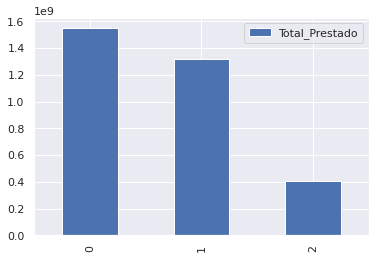

In [5]:
# ¿Que bancos le prestaron más a los empleados?
deuda_total = deuda.groupby('otorganteCredito.nombreInstitucion',as_index = False).agg({'saldoInsolutoDiciembreAnterior.valor':'sum'})
deuda_total.columns = ['Institucion', 'Total_Prestado']
deuda_total.sort_values(by='Total_Prestado', ascending=False, inplace=True)
deuda_total.reset_index(drop=True, inplace=True)
deuda_total.plot(kind='bar')

In [6]:
deuda_total

,Institucion,Total_Prestado
0,Frías - Morales,1548415148
1,Coronado S.L.,1314544112
2,Alanis - Guardado,404792185


In [7]:
total_prestado = deuda_total['Total_Prestado'].sum()
total_prestado

3267751445

In [8]:
# ¿Que servidor publico está más endeudado?
deuda_serv_publico = deuda.groupby('curp',as_index=False).agg({'saldoInsolutoDiciembreAnterior.valor':'sum'})
deuda_serv_publico.columns = ['curp','Deuda_Total']
deuda_serv_publico.sort_values(by='Deuda_Total', ascending=False, inplace=True)
top20 = deuda_serv_publico.head(20).reset_index(drop=True)
top20
# Viendo el Top 20 de los más endeudados, podemos observar que todos presentan el mismo monto de deuda. 

,curp,Deuda_Total
0,ABAF800309HPURÑT08,653240
1,PAZA840821HDFZVS04,653240
2,PEAI880706HVZDNC04,653240
3,PEAG820221MPURRB03,653240
4,PEAC730504HSNLLT05,653240
5,PAÁR860114HSNRLN04,653240
6,PAZS720819HVZTMB01,653240
7,PAZM810521HSNLMN05,653240
8,PAZA860706MPUTMR03,653240
9,PAYJ841027HPURBS04,653240


In [9]:
# En donde laboran los servidores publicos más endeudados?
deuda.head()

deuda_institu = deuda.groupby('institucion', as_index=False).agg({'saldoInsolutoDiciembreAnterior.valor':'sum'})
deuda_institu.columns = ['institucion', 'Total_Deuda']
deuda_institu.sort_values(by='Total_Deuda', ascending=False, inplace=True)
top20_institu = deuda_institu.head(20).reset_index(drop=True)
top20_institu

,institucion,Total_Deuda
0,CENTRO DE INVESTIGACIONES EN OPTICA A.C.,20250440
1,COMISION NACIONAL DE AREAS NATURALES PROTEGIDAS,19597200
2,SERVICIO POSTAL MEXICANO,17637480
3,INSTITUTO NACIONAL DE CIENCIAS MEDICAS Y NUTRI...,15677760
4,PREVENCION Y READAPTACION SOCIAL,15677760
5,TRIBUNAL FEDERAL DE CONCILIACION Y ARBITRAJE,15024520
6,INSTITUTO NACIONAL DE BELLAS ARTES Y LITERATURA,15024520
7,INSTITUTO NACIONAL DE MIGRACION,15024520
8,EDUCAL S.A. DE C.V.,15024520
9,COMISION REGULADORA DE ENERGIA,14371280


In [10]:
ingresos_deuda = pd.merge(ingresos,deuda,on='id')
ingresos_deuda.drop(['_id_x','_id_y'], axis=1, inplace=True)

ingresos_deuda.head()

,totalIngresosAnualesNetos.valor,id,totalIngresosConclusionNetos.valor,serviciosProfesionales.valor,otrosIngresosMensualesTotal.valor,otrosIngresosTotal.valor,tipoOperacion,titular,numeroCuentaContrato,fechaAdquisicion,porcentajeIncrementoDecremento,tipoAdeudo.clave,tipoAdeudo.valor,montoOriginal.valor,montoOriginal.moneda,otorganteCredito.tipoPersona,otorganteCredito.nombreInstitucion,otorganteCredito.rfc,localizacionAdeudo.pais,saldoInsolutoDiciembreAnterior.valor,saldoInsolutoDiciembreAnterior.moneda,actualizacion,tipo,institucion,declaracionCompleta,actualizacionConflictoInteres,nombre,primerApellido,segundoApellido,curp,paisNacimiento,nacionalidad,rfc.rfc,rfc.homoClave,situacionPersonalEstadoCivil.clave,situacionPersonalEstadoCivil.valor,regimenMatrimonial.clave,regimenMatrimonial.valor
0,506688.0,ca1336ce-9a12-413a-bab3-b57d85a0948d,NaN,NaN,NaN,NaN,MODIFICAR,"[{'clave': 'DEC', 'valor': 'DECLARANTE'}]",98684638,2010-12-01,7%,PRPE,PRÉSTAMO PERSONAL,27989,MXN,MORAL,Frías - Morales,4b594293-4d33-443c-98bc-4b5f1481406b,MX,38692,MXN,2018-06-12 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,NaN,NaN
1,506688.0,ca1336ce-9a12-413a-bab3-b57d85a0948d,NaN,NaN,NaN,NaN,MODIFICAR,"[{'clave': 'DEC', 'valor': 'DECLARANTE'}]",23662543,2010-12-01,5%,CPER,CRÉDITO PERSONAL,48034,MXN,MORAL,Coronado S.L.,38a59df9-c50f-4167-b7ab-fcaa8c083b8c,MX,32848,MXN,2018-06-12 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,NaN,NaN
2,506688.0,ca1336ce-9a12-413a-bab3-b57d85a0948d,NaN,NaN,NaN,NaN,MODIFICAR,"[{'clave': 'DEC', 'valor': 'DECLARANTE'}]",46361608,2010-12-01,15%,CPER,CRÉDITO PERSONAL,10330,MXN,MORAL,Alanis - Guardado,407e8b14-bf51-4b70-9f97-a2be1dc81b74,MX,10115,MXN,2018-06-12 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,NaN,NaN
3,105560.0,c059912d-1d11-4f50-b027-f6dfca8f8418,NaN,NaN,NaN,NaN,MODIFICAR,"[{'clave': 'DEC', 'valor': 'DECLARANTE'}]",98684638,2010-12-01,7%,PRPE,PRÉSTAMO PERSONAL,27989,MXN,MORAL,Frías - Morales,4b594293-4d33-443c-98bc-4b5f1481406b,MX,38692,MXN,2015-06-05 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,NaN,NaN
4,105560.0,c059912d-1d11-4f50-b027-f6dfca8f8418,NaN,NaN,NaN,NaN,MODIFICAR,"[{'clave': 'DEC', 'valor': 'DECLARANTE'}]",23662543,2010-12-01,5%,CPER,CRÉDITO PERSONAL,48034,MXN,MORAL,Coronado S.L.,38a59df9-c50f-4167-b7ab-fcaa8c083b8c,MX,32848,MXN,2015-06-05 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,NaN,NaN


In [11]:
# ¿Cual es el ratio de deuda vs ingresos de los servidores publicos?
ratio = ingresos_deuda.groupby('curp', as_index=False).agg({'saldoInsolutoDiciembreAnterior.valor':'sum',
                                                    'totalIngresosAnualesNetos.valor':'sum'})
ratio.columns = ['curp', 'deuda', 'ingresos_netos']
ratio['%_de_deuda'] = (ratio['deuda']/ratio['ingresos_netos'])*100
ratio.sort_values(by='%_de_deuda', ascending=False, inplace=True)
ratio.reset_index(drop=True, inplace=True)
top20_ratio = ratio.head(20)
top20_ratio

# Podemos observar que:
#- hay empleados que se encuentran endeudados sin recibir un ingreso
#- Los mismos Curp que aparecen con deuda tienen el mismo ingreso neto total

,curp,deuda,ingresos_netos,%_de_deuda
0,MABG880226MHGRLR03,408275,0.0,inf
1,ROCM780403HYNDLN05,81655,0.0,inf
2,ROCA900530MYNDLL04,163310,0.0,inf
3,ABAF800309HPURÑT08,653240,7917000.0,8.251105
4,ORVJ810515MSNTLN06,653240,7917000.0,8.251105
5,TOAV890405HDFRTC04,653240,7917000.0,8.251105
6,CORF700225MDFLZR06,653240,7917000.0,8.251105
7,TOAA830117HVZLCN08,653240,7917000.0,8.251105
8,ARSJ880908HAGMLN08,653240,7917000.0,8.251105
9,COMR790004HDFLNM04,653240,7917000.0,8.251105


In [12]:
# ¿En que dependencias se encuentran los mayores ingresos netos anuales?
ingresos_inst = ingresos_deuda.groupby('institucion', as_index=False).agg({'totalIngresosAnualesNetos.valor':'sum'})
ingresos_inst_max = ingresos_deuda.groupby('institucion', as_index=False).agg({'totalIngresosAnualesNetos.valor':'max'})

ingresos_inst.columns = ['institucion', 'ingresos_totales']
ingresos_inst.sort_values(by='ingresos_totales', ascending=False, inplace=True)
ingresos_inst.reset_index(drop=True, inplace=True)
ingresos_inst['ingresos_totales_miles'] = ingresos_inst['ingresos_totales']/1000

ingresos_inst_max.columns = ['institucion', 'ingreso_maximo']
ingresos_inst_max.sort_values(by='ingreso_maximo', ascending=False, inplace=True)
ingresos_inst_max.reset_index(drop=True, inplace=True)

ingresos_inst = pd.merge(ingresos_inst, ingresos_inst_max, on='institucion')
ingresos_inst.head(20)



,institucion,ingresos_totales,ingresos_totales_miles,ingreso_maximo
0,CENTRO DE INVESTIGACIONES EN OPTICA A.C.,1.355923e+09,1355923.065,7020708.0
1,SERVICIO POSTAL MEXICANO,1.314602e+09,1314602.418,6934692.0
2,COMISION NACIONAL DE AREAS NATURALES PROTEGIDAS,1.199983e+09,1199983.221,7289304.0
3,INSTITUTO NACIONAL DE LAS PERSONAS ADULTAS MAY...,1.158865e+09,1158864.795,7188888.0
4,COMISION REGULADORA DE ENERGIA,1.120481e+09,1120481.496,7336524.0
5,TRIBUNAL FEDERAL DE CONCILIACION Y ARBITRAJE,1.100362e+09,1100362.236,7454748.0
6,CONSEJO NACIONAL DE FOMENTO EDUCATIVO,1.074921e+09,1074920.526,7394856.0
7,FIDEICOMISO DE FORMACION Y CAPACITACION PARA E...,1.058634e+09,1058634.153,7492560.0
8,PATRONATO DE OBRAS E INSTALACIONES DEL INSTITU...,1.048469e+09,1048469.397,7470084.0
9,COLEGIO DE POSTGRADUADOS,1.041583e+09,1041582.978,7394808.0


Text(0, 0.5, 'ingresos totales institucion(miles)')

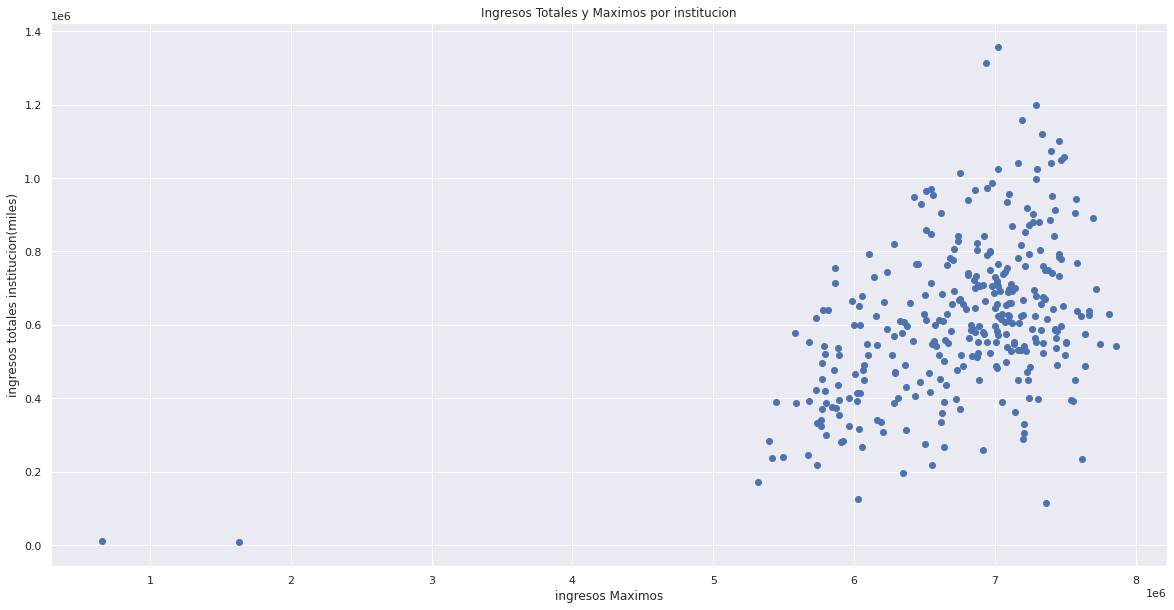

In [13]:
fig = plt.figure(figsize=(20,10), )
ax = plt.axes()
plt.scatter(x=ingresos_inst['ingreso_maximo'], y=ingresos_inst['ingresos_totales_miles'])
#ax.set_facecolor('black')
plt.title('Ingresos Totales y Maximos por institucion')
plt.xlabel('ingresos Maximos')
plt.ylabel('ingresos totales institucion(miles)')


In [14]:
# Top 20 de las instituciones con más ingresos entre sus empleados. 
top20_ingr_inst = ingresos_inst.head(20)

top20_ingr_inst


,institucion,ingresos_totales,ingresos_totales_miles,ingreso_maximo
0,CENTRO DE INVESTIGACIONES EN OPTICA A.C.,1.355923e+09,1355923.065,7020708.0
1,SERVICIO POSTAL MEXICANO,1.314602e+09,1314602.418,6934692.0
2,COMISION NACIONAL DE AREAS NATURALES PROTEGIDAS,1.199983e+09,1199983.221,7289304.0
3,INSTITUTO NACIONAL DE LAS PERSONAS ADULTAS MAY...,1.158865e+09,1158864.795,7188888.0
4,COMISION REGULADORA DE ENERGIA,1.120481e+09,1120481.496,7336524.0
5,TRIBUNAL FEDERAL DE CONCILIACION Y ARBITRAJE,1.100362e+09,1100362.236,7454748.0
6,CONSEJO NACIONAL DE FOMENTO EDUCATIVO,1.074921e+09,1074920.526,7394856.0
7,FIDEICOMISO DE FORMACION Y CAPACITACION PARA E...,1.058634e+09,1058634.153,7492560.0
8,PATRONATO DE OBRAS E INSTALACIONES DEL INSTITU...,1.048469e+09,1048469.397,7470084.0
9,COLEGIO DE POSTGRADUADOS,1.041583e+09,1041582.978,7394808.0


Text(0, 0.5, 'total deuda institucion')

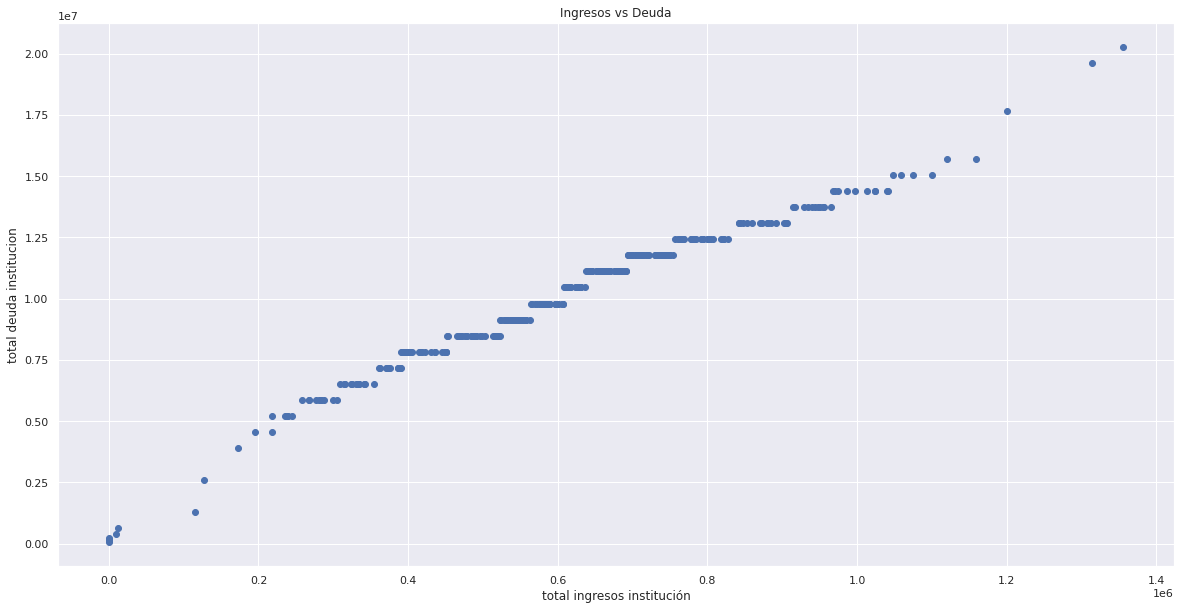

In [15]:
# ¿Hay relacion entre los sueldos totales de los empleados y su deuda?
fig = plt.figure(figsize=(20,10), )
ax = plt.axes()
plt.scatter(x=ingresos_inst['ingresos_totales_miles'], y=deuda_institu['Total_Deuda'])
#ax.set_facecolor('black')
plt.title('Ingresos vs Deuda')
plt.xlabel('total ingresos institución')
plt.ylabel('total deuda institucion')


In [16]:
# ¿Quienes son los servidores publicos con mayores ingresos?
ingresos_servidor = ingresos_deuda.groupby('curp', as_index=False).agg({'totalIngresosAnualesNetos.valor':'sum'})
ingresos_servidor.columns = ['curp','ingreso_anual_neto']
ingresos_servidor.sort_values(by='ingreso_anual_neto', ascending=False, inplace=True)
ingresos_servidor.reset_index(drop=True,inplace=True)
top20_servidores_mayor_ingreso = ingresos_servidor.head(20)
top20_servidores_mayor_ingreso

# Primeramente nos percatamos que todos estos sueldos superan el monto maximo permitido por ley para que pueda ser persibido por un servidor publico. 

,curp,ingreso_anual_neto
0,MAZC870319MDFSPN07,111373794.0
1,MEAS870820MAGDNS06,111273915.0
2,KYVE740104MAGYLS04,111074583.0
3,LOCC770613MPUNRL02,111030258.0
4,XIZM890303HDFCVR04,110509884.0
5,SÁTS710106HSNNVN06,110434830.0
6,TÉSV860821MVZLLR09,110371320.0
7,MIKS801117MPURRL08,110140380.0
8,LIAA710909MDFMNF03,109919301.0
9,RUCI870026HVZZZN04,109769730.0


In [17]:
estudios.drop('Unnamed: 0', axis=1, inplace=True)
estudios.head()

,tipoOperacion,carreraAreaConocimiento,status,documentoObtenido,fechaObtencion,nivel.clave,nivel.valor,institucionEducativa.nombre,institucionEducativa.ubicacion,_id,id,estatus
0,SIN_CAMBIOS,Licenciatura en Administración de Empresas Tur...,FINALIZADO,TITULO,2010-05-19T01:40:07.354Z,LIC,LICENCIATURA,Universidad ICEL,MX,61a804c8f6e28cab0bf39988,ca1336ce-9a12-413a-bab3-b57d85a0948d,NaN
1,SIN_CAMBIOS,Licenciatura en Administración de Empresas Tur...,FINALIZADO,TITULO,2010-05-19T01:40:07.354Z,LIC,LICENCIATURA,Universidad ICEL,MX,61a804c8f6e28cab0bf39989,c059912d-1d11-4f50-b027-f6dfca8f8418,NaN
2,SIN_CAMBIOS,Licenciatura en Administración de Empresas Tur...,FINALIZADO,TITULO,2010-05-19T01:40:07.354Z,LIC,LICENCIATURA,Universidad ICEL,MX,61a804c8f6e28cab0bf3998a,ff372d3d-d898-40f8-8577-9cd5ffa1be68,NaN
3,AGREGAR,Licenciatura en Administración de Empresas Tur...,FINALIZADO,TITULO,2010-05-19T01:40:07.354Z,LIC,LICENCIATURA,Universidad ICEL,MX,61a804c8f6e28cab0bf3998b,2f8f42bf-56cc-4c14-af44-d744b70824a4,NaN
4,SIN_CAMBIOS,Licenciatura en Administración de Empresas Tur...,FINALIZADO,TITULO,2010-05-19T01:40:07.354Z,LIC,LICENCIATURA,Universidad ICEL,MX,61a804c8f6e28cab0bf3998c,5736d89a-a9bc-4fad-be67-985aa04b47df,NaN


In [18]:
estudios = pd.merge(estudios, data, on='id')
estudios.drop('_id_y', axis=1, inplace=True)
estudios.head()

,tipoOperacion,carreraAreaConocimiento,status,documentoObtenido,fechaObtencion,nivel.clave,nivel.valor,institucionEducativa.nombre,institucionEducativa.ubicacion,_id,id,estatus,actualizacion,tipo,institucion,declaracionCompleta,actualizacionConflictoInteres,nombre,primerApellido,segundoApellido,curp,paisNacimiento,nacionalidad,rfc.rfc,rfc.homoClave,situacionPersonalEstadoCivil.clave,situacionPersonalEstadoCivil.valor,regimenMatrimonial.clave,regimenMatrimonial.valor
0,SIN_CAMBIOS,Licenciatura en Administración de Empresas Tur...,FINALIZADO,TITULO,2010-05-19T01:40:07.354Z,LIC,LICENCIATURA,Universidad ICEL,MX,61a804c8f6e28cab0bf39988,ca1336ce-9a12-413a-bab3-b57d85a0948d,NaN,2018-06-12 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,NaN,NaN
1,SIN_CAMBIOS,Licenciatura en Administración de Empresas Tur...,FINALIZADO,TITULO,2010-05-19T01:40:07.354Z,LIC,LICENCIATURA,Universidad ICEL,MX,61a804c8f6e28cab0bf39989,c059912d-1d11-4f50-b027-f6dfca8f8418,NaN,2015-06-05 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,NaN,NaN
2,SIN_CAMBIOS,Licenciatura en Administración de Empresas Tur...,FINALIZADO,TITULO,2010-05-19T01:40:07.354Z,LIC,LICENCIATURA,Universidad ICEL,MX,61a804c8f6e28cab0bf3998a,ff372d3d-d898-40f8-8577-9cd5ffa1be68,NaN,2017-06-06 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,NaN,NaN
3,AGREGAR,Licenciatura en Administración de Empresas Tur...,FINALIZADO,TITULO,2010-05-19T01:40:07.354Z,LIC,LICENCIATURA,Universidad ICEL,MX,61a804c8f6e28cab0bf3998b,2f8f42bf-56cc-4c14-af44-d744b70824a4,NaN,2015-02-06 00:00:00+00:00,INICIAL,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,NaN,NaN
4,SIN_CAMBIOS,Licenciatura en Administración de Empresas Tur...,FINALIZADO,TITULO,2010-05-19T01:40:07.354Z,LIC,LICENCIATURA,Universidad ICEL,MX,61a804c8f6e28cab0bf3998c,5736d89a-a9bc-4fad-be67-985aa04b47df,NaN,2020-06-08 23:00:00+00:00,MODIFICACIÓN,SERVICIO DE INFORMACION AGROALIMENTARIA Y PESQ...,True,False,Patricio,Córdova,Guevara,CÓGP760116HAGRVT08,US,MX,CÓGP760116,E91,SOL,SOLTERO,NaN,NaN


In [19]:
estudios['nivel_estudios'] = np.where(estudios['nivel.clave'] == 'LIC',1,np.where(estudios['nivel.clave'] == 'ESP',2,np.where(estudios['nivel.clave'] == 'MAE',3,np.where(estudios['nivel.clave'] == 'DOC',4,0))))


In [20]:
max_nivel_estudios = estudios.groupby('curp').agg({'nivel_estudios':'max'})
estudios_ingresos = pd.merge(max_nivel_estudios,ingresos_servidor,on='curp')
estudios_ingresos = pd.merge(deuda_serv_publico, estudios_ingresos, on='curp')

estudios_ingresos['nivel_estudios'] = np.where(estudios_ingresos['nivel_estudios'] == 1,'LIC',np.where(estudios_ingresos['nivel_estudios'] == 2,'ESP',np.where(estudios_ingresos['nivel_estudios'] == 3,'MAE',np.where(estudios_ingresos['nivel_estudios'] == 4,'DOC',0))))
estudios_ingresos

,curp,Deuda_Total,nivel_estudios,ingreso_anual_neto
0,ABAF800309HPURÑT08,653240,LIC,7917000.0
1,PAZA840821HDFZVS04,653240,LIC,12000000.0
2,PEAI880706HVZDNC04,653240,LIC,12000000.0
3,PEAG820221MPURRB03,653240,LIC,7917000.0
4,PEAC730504HSNLLT05,653240,LIC,9514125.0
...,...,...,...,...
5000,ÑAUM890715HAGÑRR09,653240,ESP,18034596.0
5001,MABG880226MHGRLR03,408275,LIC,0.0
5002,MARG900821HDFCVS05,244965,LIC,9688107.0
5003,ROCA900530MYNDLL04,163310,LIC,0.0


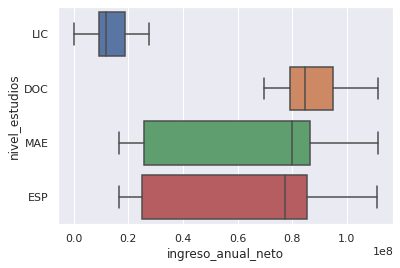

In [21]:
ax = sns.boxplot(x = estudios_ingresos['ingreso_anual_neto'], y = estudios_ingresos['nivel_estudios'])

# Analisis de los servidores publicos con Sanciones

In [22]:
with open('/content/drive/MyDrive/Dataton2021/Sistema3Servidores.json') as file:
  sis3_servidores = json.load(file)

sis3_servidores = pd.json_normalize(sis3_servidores)

for i in range(len(sis3_servidores.index)):
  
  for key in sis3_servidores['tipoSancion'][i][0].keys():
    sis3_servidores['tipoSancion.'+key] = sis3_servidores['tipoSancion'][i][0][key]

sis3_servidores.drop(['tipoSancion.descripcion','tipoSancion'],axis=1, inplace=True)


In [23]:
sis3_servidores.head()

,id,fechaCaptura,expediente,autoridadSancionadora,causaMotivoHechos,observaciones,institucionDependencia.nombre,servidorPublicoSancionado.rfc.rfc,servidorPublicoSancionado.rfc.homoClave,servidorPublicoSancionado.curp,servidorPublicoSancionado.nombres,servidorPublicoSancionado.primerApellido,servidorPublicoSancionado.segundoApellido,servidorPublicoSancionado.genero.clave,servidorPublicoSancionado.genero.valor,servidorPublicoSancionado.puesto,tipoFalta.clave,tipoFalta.valor,tipoFalta.descripcion,resolucion.fechaResolucion,multa.moneda.clave,multa.moneda.valor,multa.monto,inhabilitacion.plazo,inhabilitacion.fechaInicial,inhabilitacion.fechaFinal,servidorPublicoSancionado.rfc,tipoSancion.clave,tipoSancion.valor
0,a94cacc9-53ba-40d1-bc04-08b765010ac0,2010-01-01,SANC/bed70faf,Contraloría Interna,DESVÍO DE RECURSOS PÚBLICOS,"Al contrario del pensamiento popular, el texto...",Comisión Federal de Electricidad,PUDD930927,E33,PUDD930927MVZG N02,Daniela,Puga,de Anda,M,FEMENINO,Jefe de departamento,ASEX,COMETER O TOLERAR CONDUCTAS DE ACOSO SEXUAL,COMETER O TOLERAR CONDUCTAS DE ACOSO SEXUAL,2010-01-01,MXN,Peso Mexicano,13185.0,NaN,NaN,NaN,NaN,IRSC,INDEMNIZACIÓN RESARCITORIA
1,6902edeb-1a0a-4ccf-af66-6b9308e0e173,2010-03-01,EXP/80ca6e1b,Contraloría Interna,ABUSO DE FUNCIONES,Lorem Ipsum es simplemente el texto de relleno...,Comisión Federal de Electricidad,VICJ950414,E62,VICJ950414MVZLRS02,Jose Daniel,Villarreal,Carrion,M,FEMENINO,Jefe de departamento,AC,ACTO DE CORRUPCIÓN,RECIBIR SOBORNO POR UN TRÁMITE,2010-01-01,MXN,Peso Mexicano,9074.0,NaN,NaN,NaN,NaN,IRSC,INDEMNIZACIÓN RESARCITORIA
2,e5f8626a-fa7f-41aa-bbe7-4685473ca62f,2010-04-01,SANC/23af791f,Contraloría Interna,TRÁFICO DE INFLUENCIAS,"Al contrario del pensamiento popular, el texto...",Comisión Federal de Electricidad,GAER730906,B58,GAER730906MVZSHC05,Ricardo,Gastélum,Echevarría,M,FEMENINO,Jefe de departamento,ENCB,ENCUBRIMIENTO,ENCUBRIMIENTO,2010-01-01,NaN,NaN,NaN,6 años,2010-01-01,2016-00-01,NaN,IRSC,INDEMNIZACIÓN RESARCITORIA
3,24700b4b-9fa1-4d46-8a84-93a53a66fe82,2010-04-31,GCPD/b0b7b091,Contraloría Interna,"COHECHO, ACEPTO BENEFICIO NO COMPRENDIDO EN SU...","Al contrario del pensamiento popular, el texto...",Comisión Federal de Electricidad,GAER730906,B58,GAER730906MVZSHC05,Ricardo,Gastélum,Echevarría,M,FEMENINO,Jefe de departamento,OTRO,OTRO,OTRO,2010-01-01,MXN,Peso Mexicano,21956.0,NaN,NaN,NaN,NaN,IRSC,INDEMNIZACIÓN RESARCITORIA
4,a89fa644-deea-49a0-883c-314cd166ceff,2010-01-01,GCPD/01a89518,Tribunal,CONTRATACIÓN INDEBIDA,"Al contrario del pensamiento popular, el texto...",Comisión Federal de Electricidad,RAQR910021,D72,RAQR910021MAGMRM06,Ramón,Ramos,Quiroz,M,FEMENINO,Jefe de departamento,IDSP,INCUMPLIMIENTO EN DECLARACION DE SITUACION PAT...,OCULTAMIENTODE PROPIEDADES,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IRSC,INDEMNIZACIÓN RESARCITORIA


In [24]:
# Cuales son los motivos más recurrentes en las sanciones impuestas?
motivos_recurrentes = sis3_servidores.groupby('causaMotivoHechos', as_index=False).agg({'id':'count'})
motivos_recurrentes.sort_values(by='id', ascending=False, inplace=True)
motivos_recurrentes.reset_index(drop=True, inplace=True)
motivos_recurrentes['%'] = (motivos_recurrentes['id'] / len(sis3_servidores))*100
motivos_recurrentes

,causaMotivoHechos,id,%
0,LA EMPRESA PROPORCIONÓ INFORMACIÓN NO VERAZ,99,10.702703
1,NO FORMALIZACION DE CONTRATO,91,9.837838
2,NO HABER EXHIBIDO LA GARANTÍA DE CUMPLIMIENTO ...,81,8.756757
3,NO ENTREGAR LA OBRA EN LA FECHA COMPROMETIDA,79,8.540541
4,DESVÍO DE RECURSOS PÚBLICOS,67,7.243243
5,ABUSO DE FUNCIONES,65,7.027027
6,"COHECHO, ACEPTO BENEFICIO NO COMPRENDIDO EN SU...",65,7.027027
7,ENRIQUECIMIENTO OCULTO,60,6.486486
8,CONFLICTO DE INTERÉS,58,6.270270
9,CONTRATACIÓN INDEBIDA,54,5.837838


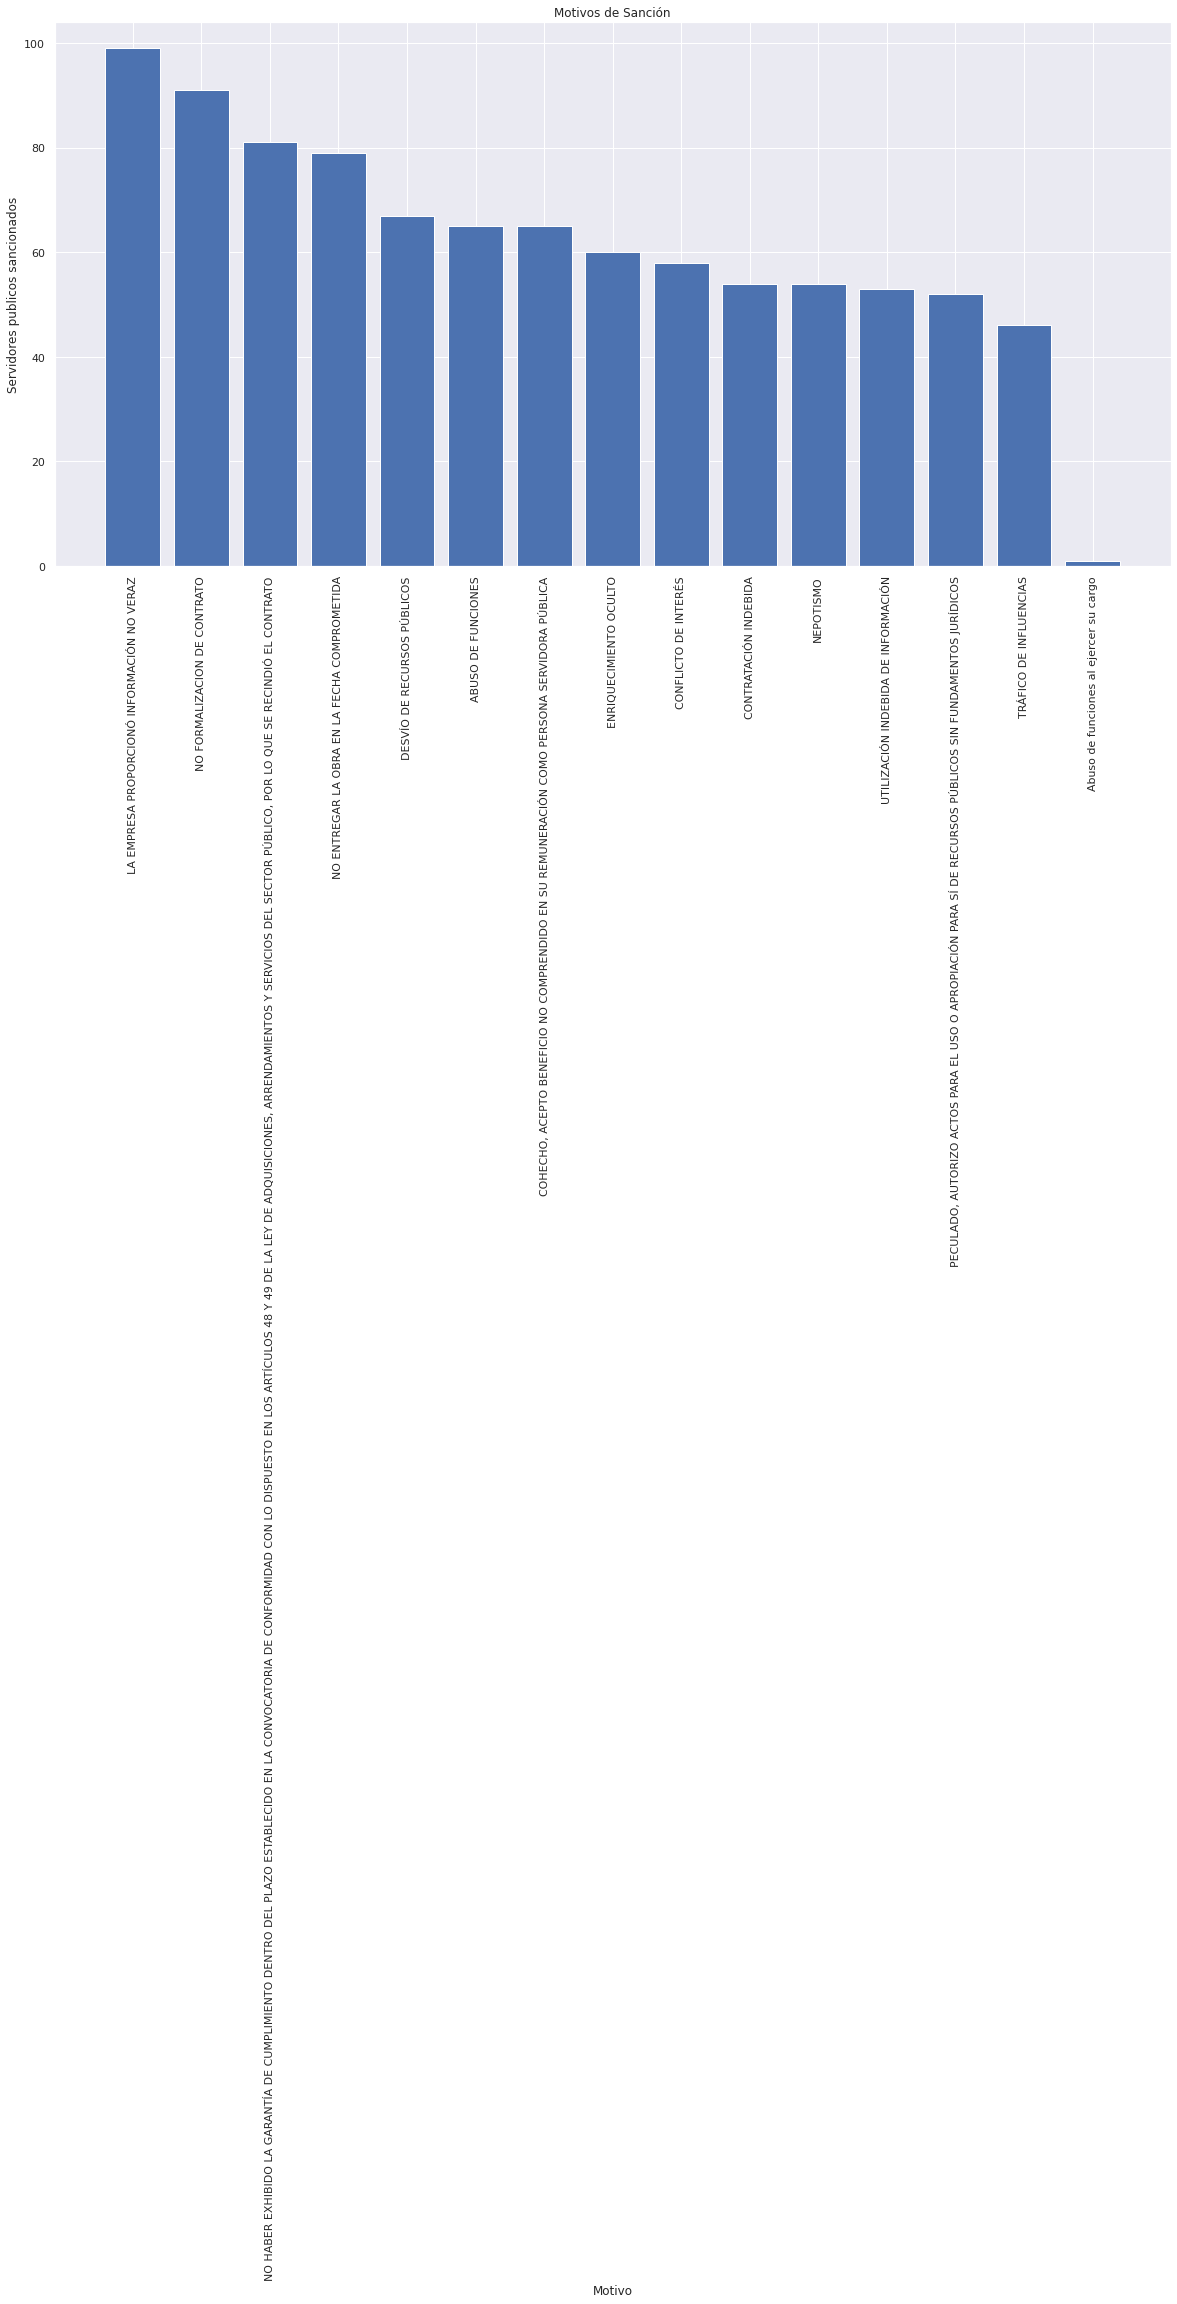

In [25]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes()
plt.bar(motivos_recurrentes['causaMotivoHechos'],height=motivos_recurrentes['id'])

plt.title('Motivos de Sanción')
plt.xlabel('Motivo')
plt.ylabel('Servidores publicos sancionados')
plt.xticks(rotation=90);
plt.savefig('Motivos_sanción.png')

In [26]:
# En donde trabajan los servidores publicos sancionados?
institucion_sancionados = sis3_servidores.groupby('institucionDependencia.nombre', as_index=False).agg({'id':'count'})
institucion_sancionados.sort_values(by='id', ascending=False, inplace=True)
institucion_sancionados.reset_index(drop=True, inplace=True)
institucion_sancionados = institucion_sancionados.head(20)
institucion_sancionados['%'] = (institucion_sancionados['id']/len(sis3_servidores))*100
institucion_sancionados

,institucionDependencia.nombre,id,%
0,Secretaría de Hacienda y Crédito Público,123,13.297297
1,Secretaría de la Función Pública,122,13.189189
2,Instituto Federal de Telecomunicaciones,105,11.351351
3,Comisión Federal de Electricidad,74,8.000000
4,ADMINISTRACION PORTUARIA INTEGRAL DE COATZACOA...,6,0.648649
5,ADMINISTRACION PORTUARIA INTEGRAL DE SALINA CR...,6,0.648649
6,BANCO DEL AHORRO NACIONAL Y SERVICIOS FINANCIE...,5,0.540541
7,HOSPITAL REGIONAL DE ALTA ESPECIALIDAD DE CIUD...,5,0.540541
8,INSTITUTO MATIAS ROMERO DE ESTUDIOS DIPLOMATICOS,5,0.540541
9,FIDEICOMISO FONDO NACIONAL DE HABITACIONES POP...,5,0.540541


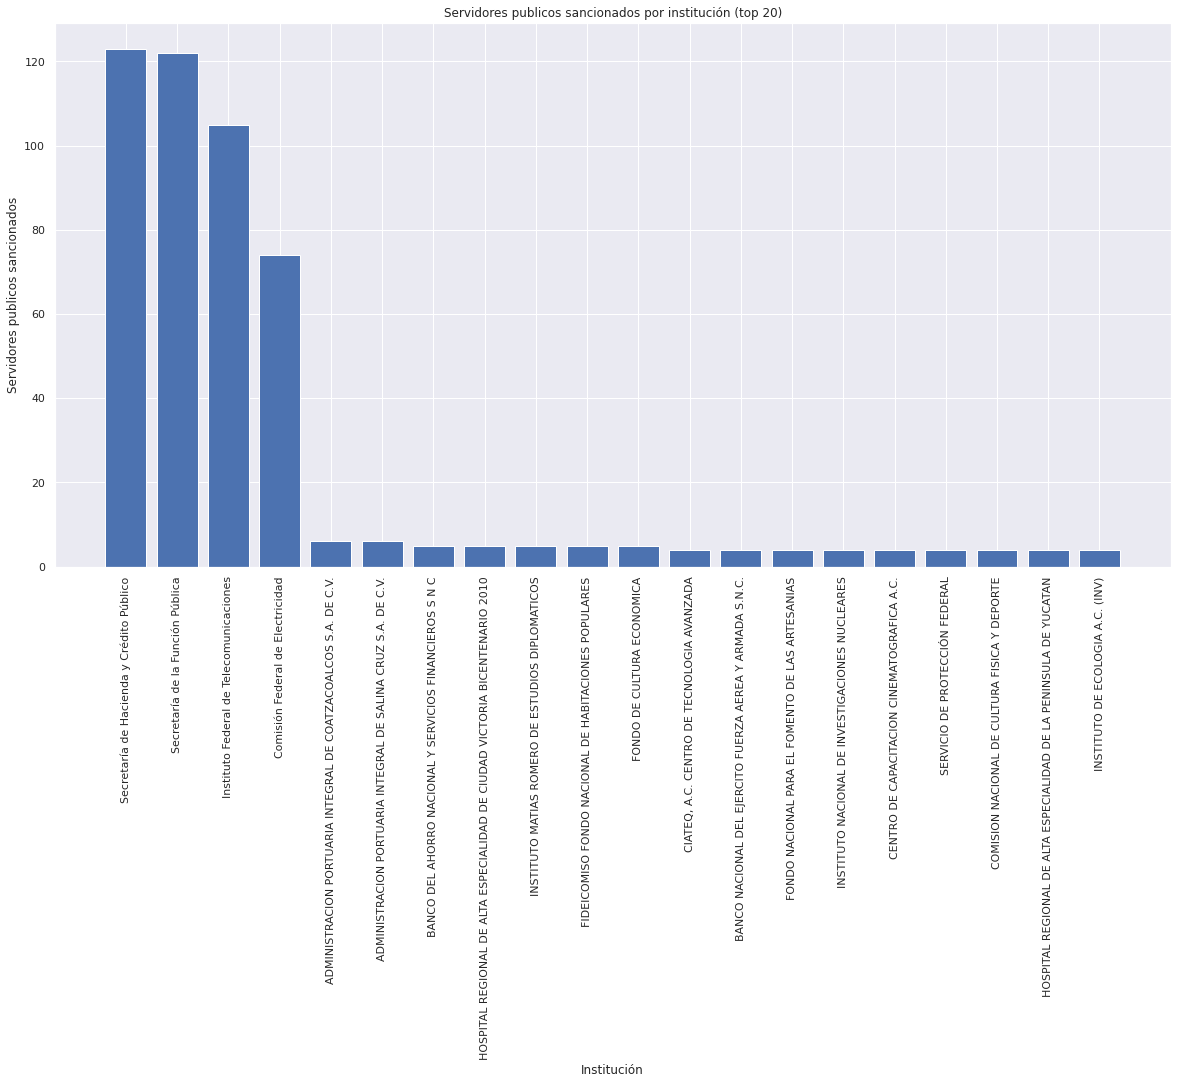

In [27]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes()
plt.bar(institucion_sancionados['institucionDependencia.nombre'],height=institucion_sancionados['id'])

plt.title('Servidores publicos sancionados por institución (top 20)')
plt.xlabel('Institución')
plt.ylabel('Servidores publicos sancionados')
plt.xticks(rotation=90);
plt.savefig('Servidores_publicos_sancionados_por_institucion.png')
# Podemos observar que la mayoría de los servidores sancinados se encuentran solamente en 4 instituciones, que son las que concentran el 45% de los datos

In [28]:
total_sancionados = len(sis3_servidores)
institucion_sancionados['%'] = (institucion_sancionados['id']/total_sancionados)*100
institucion_sancionados['%_acumulado'] = institucion_sancionados['%'].cumsum()
institucion_sancionados

,institucionDependencia.nombre,id,%,%_acumulado
0,Secretaría de Hacienda y Crédito Público,123,13.297297,13.297297
1,Secretaría de la Función Pública,122,13.189189,26.486486
2,Instituto Federal de Telecomunicaciones,105,11.351351,37.837838
3,Comisión Federal de Electricidad,74,8.000000,45.837838
4,ADMINISTRACION PORTUARIA INTEGRAL DE COATZACOA...,6,0.648649,46.486486
5,ADMINISTRACION PORTUARIA INTEGRAL DE SALINA CR...,6,0.648649,47.135135
6,BANCO DEL AHORRO NACIONAL Y SERVICIOS FINANCIE...,5,0.540541,47.675676
7,HOSPITAL REGIONAL DE ALTA ESPECIALIDAD DE CIUD...,5,0.540541,48.216216
8,INSTITUTO MATIAS ROMERO DE ESTUDIOS DIPLOMATICOS,5,0.540541,48.756757
9,FIDEICOMISO FONDO NACIONAL DE HABITACIONES POP...,5,0.540541,49.297297


In [29]:
# ¿Que puestos ocupan los servidores publicos sancionados?
sis3_servidores.replace({'Jefe de departamento':'Jefe de Departamento'}, inplace=True)
puesto = sis3_servidores.groupby('servidorPublicoSancionado.puesto', as_index=False).agg({'id':'count'})
puesto.sort_values(by='id', ascending=False, inplace=True)
puesto.reset_index(drop=True, inplace=True)
puesto['%'] = (puesto['id']/len(sis3_servidores))*100
puesto

,servidorPublicoSancionado.puesto,id,%
0,Jefe de Departamento,225,24.324324
1,Titular de Unidad,88,9.513514
2,Subdirector de Area,78,8.432432
3,Director General Adjunto,73,7.891892
4,Subdirector,65,7.027027
5,Director General,63,6.810811
6,Subadministrador,49,5.297297
7,Director,46,4.972973
8,Analista,44,4.756757
9,Administrador,43,4.648649


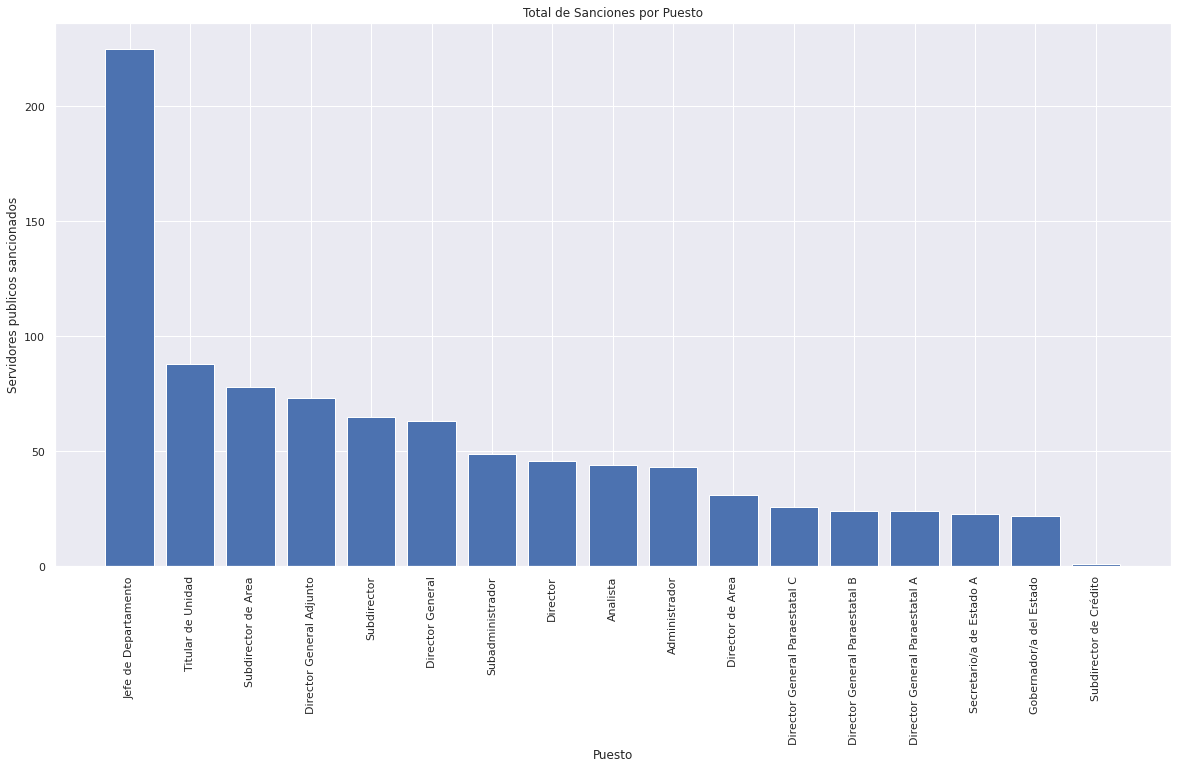

In [30]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes()
plt.bar(puesto['servidorPublicoSancionado.puesto'],height=puesto['id'])

plt.title('Total de Sanciones por Puesto')
plt.xlabel('Puesto')
plt.ylabel('Servidores publicos sancionados')
plt.xticks(rotation=90);
plt.savefig('Total_Sanciones_por_puesto.png')

In [31]:
# ¿Cuales son las faltas cometidas?
falta = sis3_servidores.groupby('tipoFalta.clave', as_index=False).agg({'id':'count'})
falta.sort_values(by='id', ascending=False, inplace=True)
falta.reset_index(drop=True, inplace=True)

falta.head(20)

,tipoFalta.clave,id
0,AFN,52
1,ABCI,45
2,OTRO,45
3,TINF,42
4,ENCB,41
5,PEC,39
6,CIND,39
7,EOCI,38
8,OJUST,38
9,CEX,37


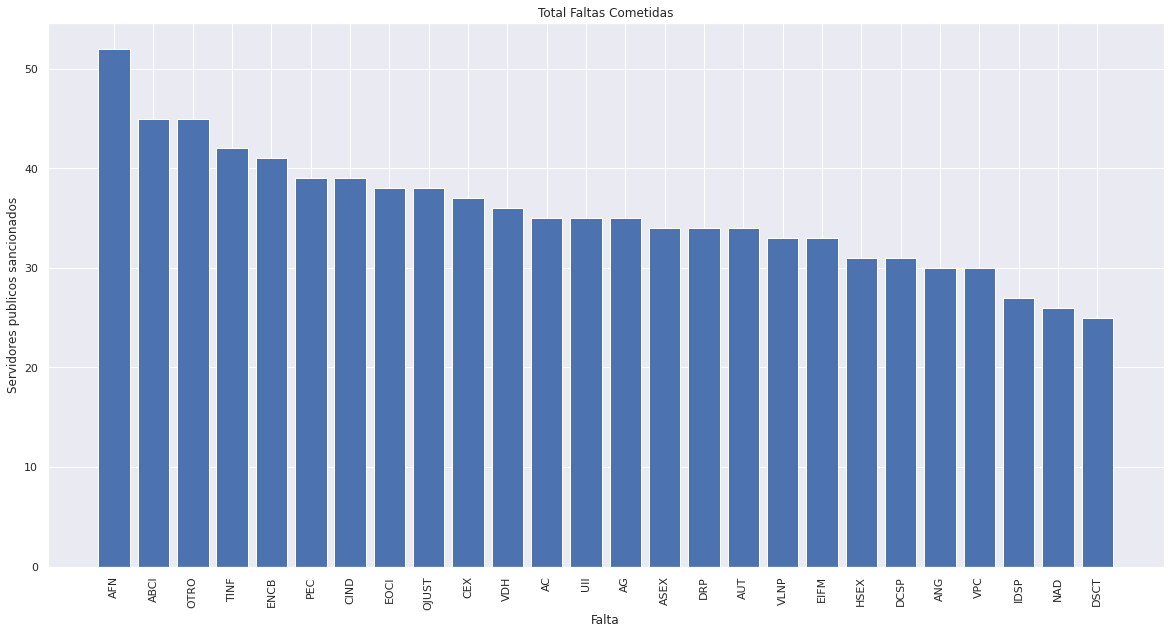

In [32]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes()
plt.bar(falta['tipoFalta.clave'],height=falta['id'])

plt.title('Total Faltas Cometidas')
plt.xlabel('Falta')
plt.ylabel('Servidores publicos sancionados')
plt.xticks(rotation=90);
plt.savefig('Total_sanciones_falta_cometida.png')

# Trabajando las sanciones con sus declaraciones

In [33]:
declaraciones_sancionados = pd.merge(sis3_servidores,estudios_ingresos,how='left', right_on='curp', left_on = 'servidorPublicoSancionado.curp')
declaraciones_sancionados.head()

,id,fechaCaptura,expediente,autoridadSancionadora,causaMotivoHechos,observaciones,institucionDependencia.nombre,servidorPublicoSancionado.rfc.rfc,servidorPublicoSancionado.rfc.homoClave,servidorPublicoSancionado.curp,servidorPublicoSancionado.nombres,servidorPublicoSancionado.primerApellido,servidorPublicoSancionado.segundoApellido,servidorPublicoSancionado.genero.clave,servidorPublicoSancionado.genero.valor,servidorPublicoSancionado.puesto,tipoFalta.clave,tipoFalta.valor,tipoFalta.descripcion,resolucion.fechaResolucion,multa.moneda.clave,multa.moneda.valor,multa.monto,inhabilitacion.plazo,inhabilitacion.fechaInicial,inhabilitacion.fechaFinal,servidorPublicoSancionado.rfc,tipoSancion.clave,tipoSancion.valor,curp,Deuda_Total,nivel_estudios,ingreso_anual_neto
0,a94cacc9-53ba-40d1-bc04-08b765010ac0,2010-01-01,SANC/bed70faf,Contraloría Interna,DESVÍO DE RECURSOS PÚBLICOS,"Al contrario del pensamiento popular, el texto...",Comisión Federal de Electricidad,PUDD930927,E33,PUDD930927MVZG N02,Daniela,Puga,de Anda,M,FEMENINO,Jefe de Departamento,ASEX,COMETER O TOLERAR CONDUCTAS DE ACOSO SEXUAL,COMETER O TOLERAR CONDUCTAS DE ACOSO SEXUAL,2010-01-01,MXN,Peso Mexicano,13185.0,NaN,NaN,NaN,NaN,IRSC,INDEMNIZACIÓN RESARCITORIA,NaN,NaN,NaN,NaN
1,6902edeb-1a0a-4ccf-af66-6b9308e0e173,2010-03-01,EXP/80ca6e1b,Contraloría Interna,ABUSO DE FUNCIONES,Lorem Ipsum es simplemente el texto de relleno...,Comisión Federal de Electricidad,VICJ950414,E62,VICJ950414MVZLRS02,Jose Daniel,Villarreal,Carrion,M,FEMENINO,Jefe de Departamento,AC,ACTO DE CORRUPCIÓN,RECIBIR SOBORNO POR UN TRÁMITE,2010-01-01,MXN,Peso Mexicano,9074.0,NaN,NaN,NaN,NaN,IRSC,INDEMNIZACIÓN RESARCITORIA,NaN,NaN,NaN,NaN
2,e5f8626a-fa7f-41aa-bbe7-4685473ca62f,2010-04-01,SANC/23af791f,Contraloría Interna,TRÁFICO DE INFLUENCIAS,"Al contrario del pensamiento popular, el texto...",Comisión Federal de Electricidad,GAER730906,B58,GAER730906MVZSHC05,Ricardo,Gastélum,Echevarría,M,FEMENINO,Jefe de Departamento,ENCB,ENCUBRIMIENTO,ENCUBRIMIENTO,2010-01-01,NaN,NaN,NaN,6 años,2010-01-01,2016-00-01,NaN,IRSC,INDEMNIZACIÓN RESARCITORIA,NaN,NaN,NaN,NaN
3,24700b4b-9fa1-4d46-8a84-93a53a66fe82,2010-04-31,GCPD/b0b7b091,Contraloría Interna,"COHECHO, ACEPTO BENEFICIO NO COMPRENDIDO EN SU...","Al contrario del pensamiento popular, el texto...",Comisión Federal de Electricidad,GAER730906,B58,GAER730906MVZSHC05,Ricardo,Gastélum,Echevarría,M,FEMENINO,Jefe de Departamento,OTRO,OTRO,OTRO,2010-01-01,MXN,Peso Mexicano,21956.0,NaN,NaN,NaN,NaN,IRSC,INDEMNIZACIÓN RESARCITORIA,NaN,NaN,NaN,NaN
4,a89fa644-deea-49a0-883c-314cd166ceff,2010-01-01,GCPD/01a89518,Tribunal,CONTRATACIÓN INDEBIDA,"Al contrario del pensamiento popular, el texto...",Comisión Federal de Electricidad,RAQR910021,D72,RAQR910021MAGMRM06,Ramón,Ramos,Quiroz,M,FEMENINO,Jefe de Departamento,IDSP,INCUMPLIMIENTO EN DECLARACION DE SITUACION PAT...,OCULTAMIENTODE PROPIEDADES,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IRSC,INDEMNIZACIÓN RESARCITORIA,NaN,NaN,NaN,NaN


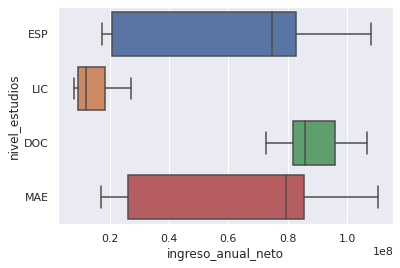

In [34]:
# ¿Como se distribuyen los sueldos y nivel de estudios de los sancionados?
ax = sns.boxplot(x = declaraciones_sancionados['ingreso_anual_neto'], y = declaraciones_sancionados['nivel_estudios'])
